In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [9]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(csv_url, header = None)

col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
iris =  pd.read_csv(csv_url, names = col_names)

# The columns of the resulting DataFrame have different dtypes.
iris.dtypes


Sepal_Length    float64
Sepal_Width     float64
Petal_Length    float64
Petal_Width     float64
Species          object
dtype: object

In [10]:
iris.head(5)
X=iris.iloc[:,:-1]
y=iris.iloc[:,-1]
X.tail()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


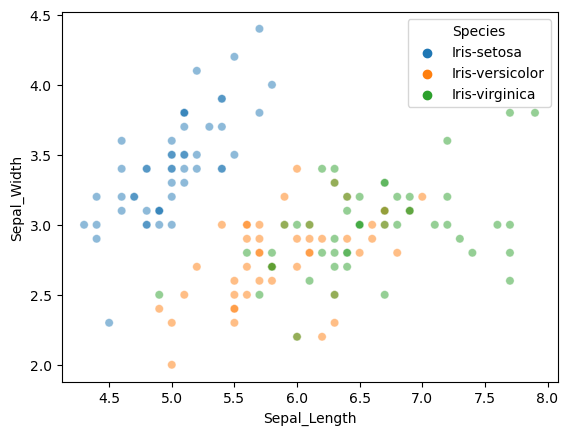

In [11]:
ax=sns.scatterplot(data=iris,x=iris["Sepal_Length"], y=iris["Sepal_Width"], alpha=0.5, hue="Species")

plt.show()

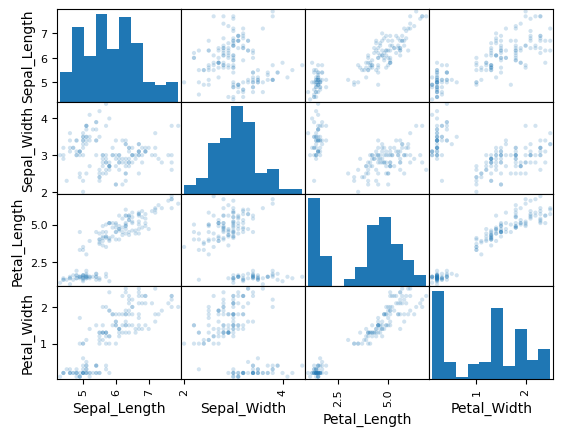

In [12]:
pd.plotting.scatter_matrix(iris, alpha=0.2)
plt.show()

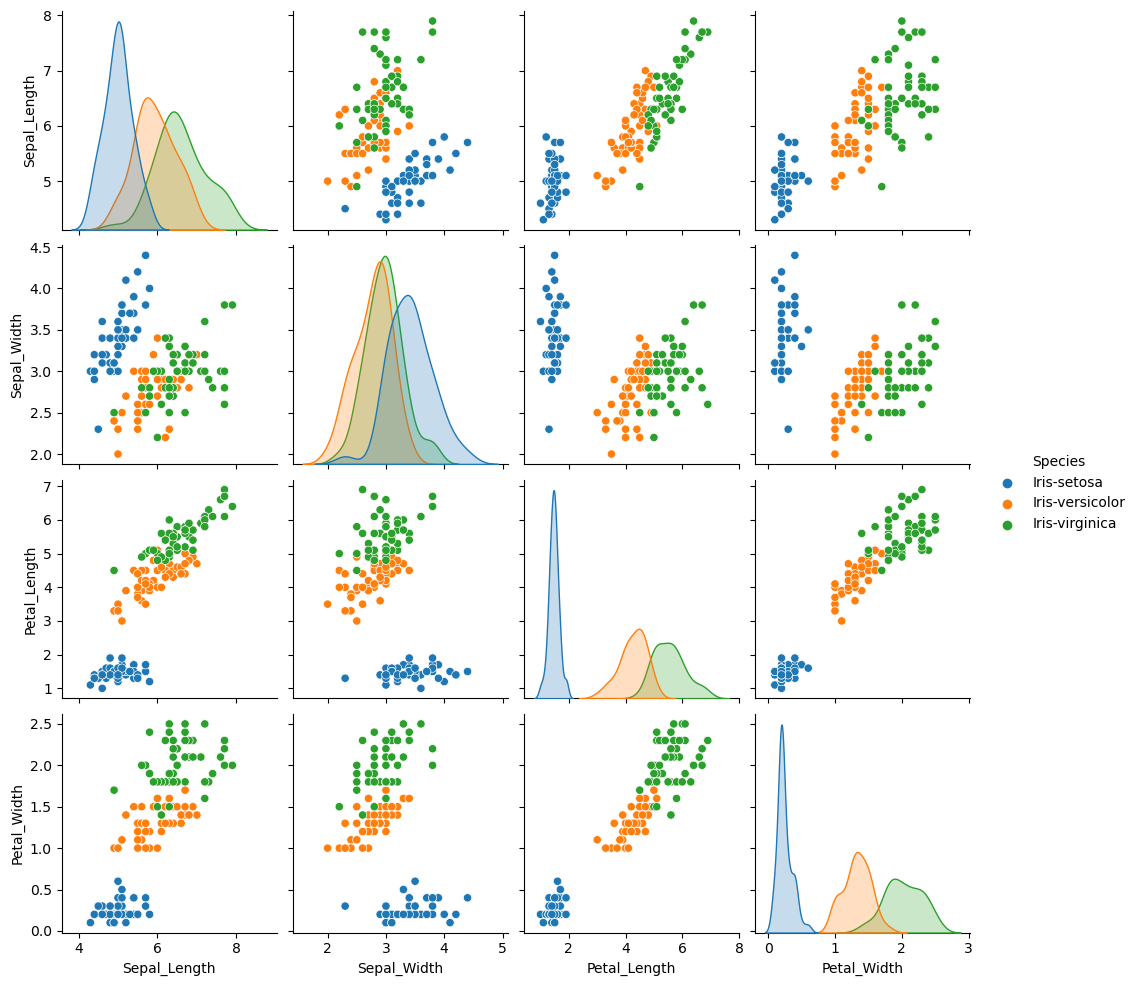

In [13]:
sns.pairplot(iris, hue="Species")

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled=scaler.fit_transform(iris.iloc[:,:-1])
iris_scaled_pca=pd.DataFrame(iris_scaled, columns= iris.columns[:-1])
pca=PCA().fit(iris_scaled)
pca_transformed=pd.DataFrame(pca.transform(iris_scaled))
print("EXPLAINED VARIANCE RATIO ",pca.explained_variance_ratio_)
print("PCA SINGULAR VALUES ",pca.singular_values_)
print("PCA COMPONENTS",pca.components_)

EXPLAINED VARIANCE RATIO  [0.72770452 0.23030523 0.03683832 0.00515193]
PCA SINGULAR VALUES  [20.89551896 11.75513248  4.7013819   1.75816839]
PCA COMPONENTS [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]


In [25]:
pca_transformed.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [26]:
iris_extended=pd.concat((iris, pca_transformed), axis=1)
iris_extended.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,0,1,2,3
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.264542,0.505704,-0.121943,-0.023073
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.086426,-0.655405,-0.227251,-0.103208
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.367950,-0.318477,0.051480,-0.027825
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.304197,-0.575368,0.098860,0.066311
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.388777,0.674767,0.021428,0.037397


[Text(0.5, 0, 'PCA 1'), Text(0, 0.5, 'PCA 2')]

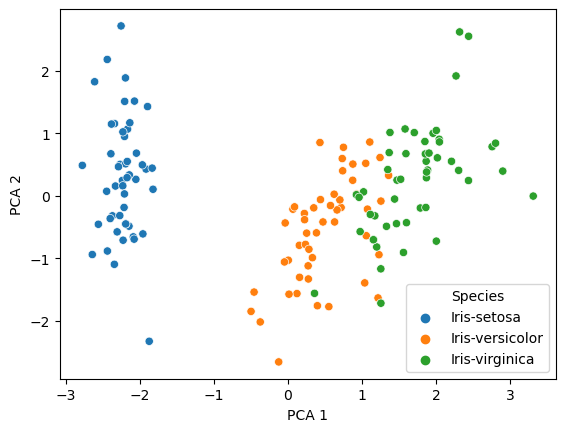

In [27]:
ax = sns.scatterplot(data=iris_extended, x=0, y=1, hue='Species')
ax.set(xlabel="PCA 1", ylabel="PCA 2")

In [31]:
#loadings
pca_features=pd.DataFrame(pca.components_, columns=iris_scaled_pca.columns)
pca_features


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416
2,-0.721017,0.242033,0.140892,0.633801
3,-0.261996,0.124135,0.801154,-0.523546


In [32]:
"""for i in range(len(pca_features)):
    print("Component ",i," best features are: ")
    arranged=new_df.loc[i].sort_values().index[::-1]
    print(arranged)
    print("\n")
"""

'for i in range(len(pca_features)):\n    print("Component ",i," best features are: ")\n    arranged=new_df.loc[i].sort_values().index[::-1]\n    print(arranged)\n    print("\n")\n'

              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.109369      0.871754     0.817954
Sepal_Width      -0.109369     1.000000     -0.420516    -0.356544
Petal_Length      0.871754    -0.420516      1.000000     0.962757
Petal_Width       0.817954    -0.356544      0.962757     1.000000


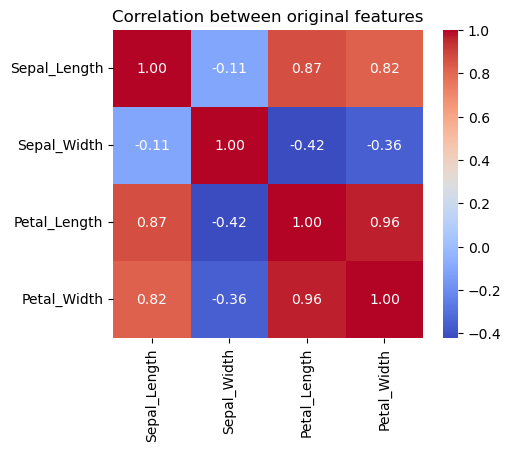

In [36]:
correlation_matrix_original = iris_scaled_pca.corr()
print(correlation_matrix_original)
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix_original, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between original features")
plt.show()


In [37]:
iris.corr()

C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_1840\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


In [38]:
pca_features.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,0.026501,0.053723,0.017640
Sepal_Width,0.026501,1.000000,-0.728597,-0.239241
Petal_Length,0.053723,-0.728597,1.000000,-0.484993
Petal_Width,0.017640,-0.239241,-0.484993,1.000000


In [39]:
from sklearn.cluster import KMeans

quant=["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width" ]
kmeans = KMeans(n_clusters=3, random_state=2).fit(iris_extended[quant])
predictions=kmeans.predict(iris_extended[quant])
clusters=kmeans.cluster_centers_
clusters=pd.DataFrame(clusters)
clusters
iris_extended["clusters"]=predictions
iris_extended.tail(100)

C:\Users\Faiza Anan Noor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Faiza Anan Noor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species,0,1,2,3,clusters
50,7.0,3.2,4.7,1.4,Iris-versicolor,1.103994,0.863112,-0.685555,-0.034978,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,0.732481,0.598636,-0.094067,-0.004454,1
52,6.9,3.1,4.9,1.5,Iris-versicolor,1.242110,0.614822,-0.554847,-0.009673,2
53,5.5,2.3,4.0,1.3,Iris-versicolor,0.397307,-1.758169,-0.018569,-0.067398,1
54,6.5,2.8,4.6,1.5,Iris-versicolor,1.072594,-0.211758,-0.397447,-0.105542,1
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1.870522,0.382822,0.254532,-0.388890,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1.558492,-0.905314,-0.025382,-0.221322,1
147,6.5,3.0,5.2,2.0,Iris-virginica,1.520845,0.266795,0.179277,-0.118903,2
148,6.2,3.4,5.4,2.3,Iris-virginica,1.376391,1.016362,0.931405,-0.024146,2


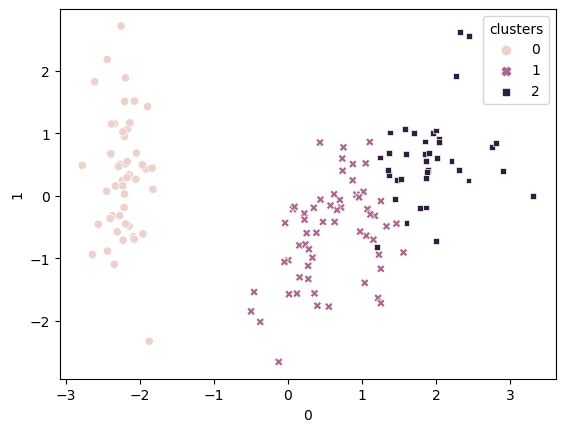

In [40]:
ax=sns.scatterplot(data=iris_extended, x=0, y=1, hue="clusters", style="clusters")